# Create data

In [1]:
import squidpy as sq
import numpy as np
import pandas as pd
import numba.types as nt

import matplotlib.pyplot as plt

# pip install git+https://github.com/h2oai/datatable.git
import datatable

import os
import csv

In [2]:
os.getcwd()

'/Users/rafaeldossantospeixoto/Library/CloudStorage/OneDrive-JohnsHopkins/jefworks/crawdad/repos/crawdad_revision_analysis/running_code/squidpy'

In [3]:
meta = datatable.fread("exported_data/df_nullsim_s1.csv")
meta = meta.to_pandas().set_index('C0')
meta.head()

,x,y,celltypes
C0,,,
cell1,265.508663,871.805021,C
cell2,372.123900,967.197048,C
cell3,572.853363,866.916271,C
cell4,908.207790,437.715302,C
cell5,201.681931,191.937792,A


In [5]:
meta['celltypes'] = meta['celltypes'].astype("category") # like levels in R, need for squidpy stuff
meta['celltypes']

C0
cell1       C
cell2       C
cell3       C
cell4       C
cell5       A
           ..
cell1996    B
cell1997    C
cell1998    D
cell1999    C
cell2000    C
Name: celltypes, Length: 2000, dtype: category
Categories (4, object): ['A', 'B', 'C', 'D']

# Squidpy

In [6]:
# just some random data for gene expression because I'm just interested in getting the coordinates and labels in there
from anndata import AnnData
from numpy.random import default_rng
rng = default_rng(42)

counts = rng.integers(0, 15, size=(meta.shape[0], 50))
counts.shape

(2000, 50)

In [7]:
adata = AnnData(counts, obsm={"spatial": np.array(meta[["x", "y"]], dtype=float)})

In [8]:
adata.obs = meta

In [9]:
adata.obs

,x,y,celltypes
C0,,,
cell1,265.508663,871.805021,C
cell2,372.123900,967.197048,C
cell3,572.853363,866.916271,C
cell4,908.207790,437.715302,C
cell5,201.681931,191.937792,A
...,...,...,...
cell1996,775.028235,585.793459,B
cell1997,69.070202,842.366851,C
cell1998,240.949266,125.383908,D


# Spatial Neighborhood

In [10]:
sq.gr.spatial_neighbors(adata, delaunay=False, radius=50, coord_type="generic", key_added="r50")

100%|██████████| 1000/1000 [00:02<00:00, 488.06/s]


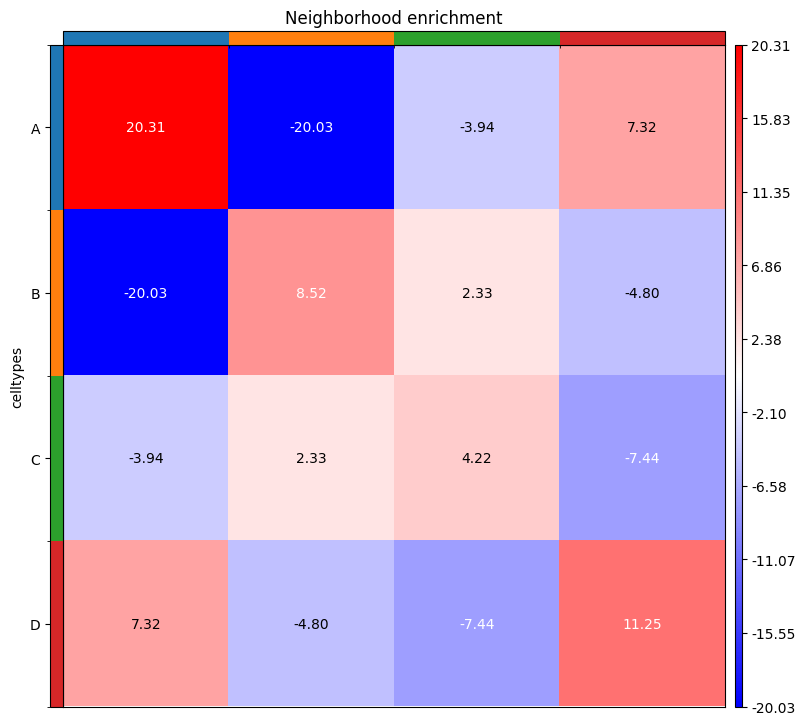

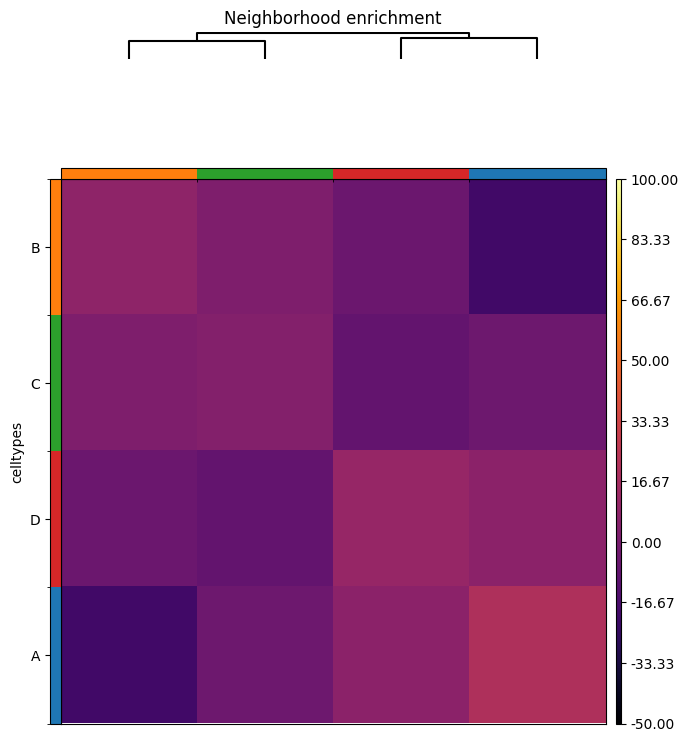

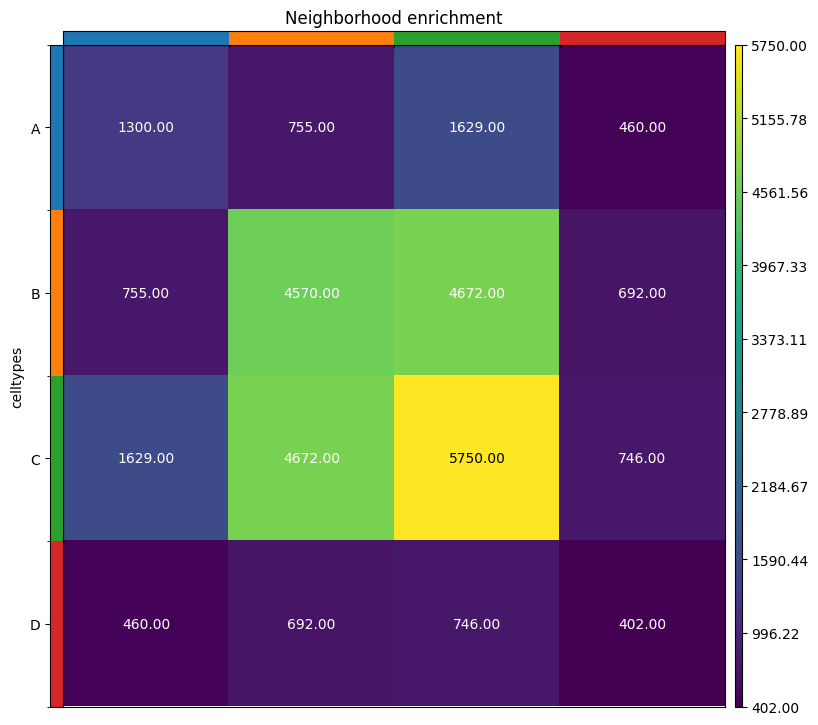

In [12]:
sq.gr.nhood_enrichment(adata, cluster_key="celltypes", connectivity_key="r50")
sq.pl.nhood_enrichment(adata, cluster_key="celltypes", mode="zscore", annotate=True, figsize=(7,7), cmap="bwr", save="spat_ngb_sim.pdf")
sq.pl.nhood_enrichment(adata, cluster_key="celltypes", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100, figsize=(7,7))
sq.pl.nhood_enrichment(adata, cluster_key="celltypes", mode="count", annotate=True, figsize=(7,7))